In [24]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model("Model/saved_model6_expAS.keras")

In [25]:
from DataLoader import get_data_loaders

train_data, val_data, test_data, data_loader = get_data_loaders(
        cases=["exp", "AS", "pi"],
        doping=6.0,
        max_shots=1500,
        combine_exp_as=True,
        train_split=0.8)

exp
mean stagg mag taken:  12.748
mean stagg mag:  12.748
1500  snapshots
AS
mean stagg mag taken:  13.577333333333334
mean stagg mag:  13.577333333333334
1500  snapshots
pi
mean stagg mag taken:  10.909333333333333
mean stagg mag:  10.909333333333333
1500  snapshots


In [26]:
import pandas as pd

x = loaded_model.predict(test_data)
df = pd.DataFrame(x, columns=["exp+AS", "pi"])

labels = []
classes = {0: "exp+AS", 1: "pi"}
for _, label in test_data:
    for l in label:
        labels.append(classes[list(l).index(1)])
len(labels)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


2025-01-26 16:31:52.213199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


450

In [27]:
df["label"] = labels
df["pred"] = df[["exp+AS", "pi"]].idxmax(axis=1)
df

,exp+AS,pi,label,pred
0,0.481728,5.182719e-01,exp+AS,pi
1,0.414592,5.854076e-01,pi,pi
2,0.999981,1.944081e-05,exp+AS,exp+AS
3,1.000000,5.059147e-09,exp+AS,exp+AS
4,0.998052,1.948176e-03,exp+AS,exp+AS
...,...,...,...,...
445,0.771766,2.282337e-01,exp+AS,exp+AS
446,0.702696,2.973043e-01,exp+AS,exp+AS
447,0.351079,6.489210e-01,pi,pi
448,0.946571,5.342921e-02,pi,exp+AS


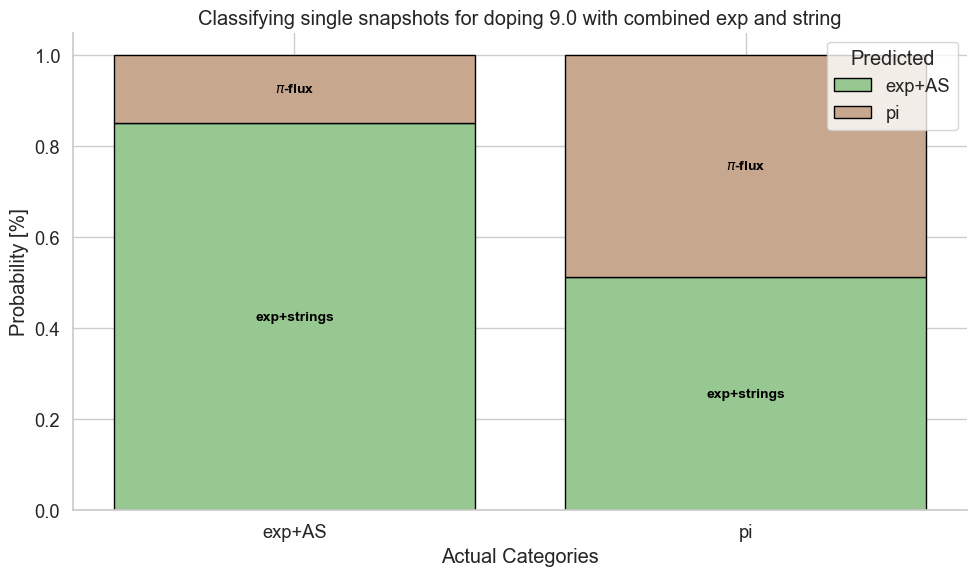

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Define categories and calculate percentages
categories = ["exp+AS", "pi"]
filtered = {c: df[df["label"] == c] for c in categories}
percentages = {
    c: {d: len(filtered[c][filtered[c]["pred"] == d]) / len(filtered[c]) for d in categories}
    for c in categories
}

# Convert percentages to a DataFrame for easier plotting
percentages_df = pd.DataFrame(percentages).T

# Define custom colors to match the example image
custom_colors = ['#98c892', '#c8a78f']  # exp (green), AS (blue), pi (tan)

# Plot with Seaborn styling
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))  # X-axis positions

# Stacked bar chart
bottoms = np.zeros(len(categories))  # Initialize the bottom position for stacking
for i, (pred, color) in enumerate(zip(categories, custom_colors)):
    bars = ax.bar(
        x,
        percentages_df[pred],
        label=f'{pred}',
        color=color,
        bottom=bottoms,
        edgecolor='black'
    )
    # Add labels to the bars
    for bar, actual_label, percentage in zip(bars, categories, percentages_df[pred]):
        y_position = bar.get_height() / 2 + bar.get_y()
        if pred == "exp+AS":
            label = "exp+strings"
        elif pred == "pi":
            label = "$\\pi$-flux"
        else:
            label = pred
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center text in bar
            y_position,  # Place text in middle of bar
            label,  # Label text
            ha='center',  # Center horizontally
            va='center',  # Center vertically
            fontsize=10,  # Font size
            color='black',  # Black text color
            weight='bold'  # Bold font
        )
    bottoms += percentages_df[pred]  # Update the bottom for stacking

# Add labels, legend, and title
ax.set_xlabel('Actual Categories')
ax.set_ylabel('Probability [%]')
ax.set_title('Classifying single snapshots for doping 9.0 with combined exp and string')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(title="Predicted", loc='upper right', frameon=True)
# Adjust aesthetics
sns.despine()
plt.tight_layout()
plt.show()